<a href="https://colab.research.google.com/github/emanueleiacca/Arithmetic-Formatter/blob/main/IRIS_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler                      # For normalizing Data
import seaborn as sns
from sklearn.decomposition import PCA


In [ ]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [ ]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<ipython-input-12-d507e38f0ca8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


<Axes: >

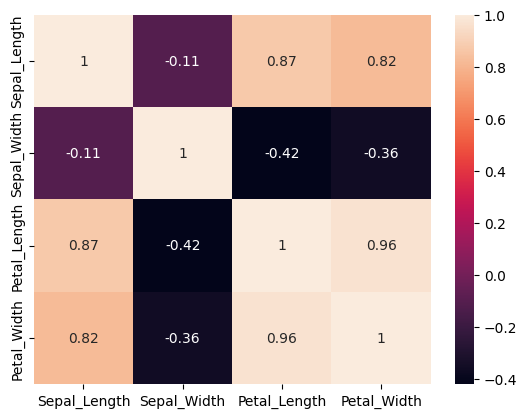

In [ ]:
sns.heatmap(iris.corr(),annot=True)
#petal lenght and petal width are highly correlated

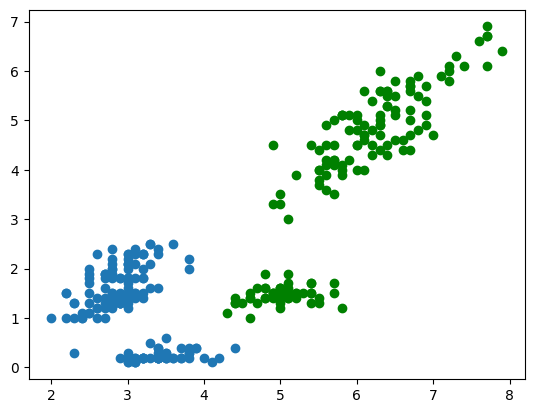

In [ ]:
plt.scatter(iris['Sepal_Length'],iris['Petal_Length'],c='g')
plt.scatter(iris['Sepal_Width'],iris['Petal_Width'])
plt.show()

In [ ]:
Iris = iris[['Sepal_Length','Sepal_Width','Petal_Length', 'Petal_Width']]

Iris_scaled = StandardScaler().fit_transform(Iris)


In [ ]:
pca = PCA()
X_new = pca.fit_transform(Iris_scaled)


In [ ]:
pca.get_covariance()


array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

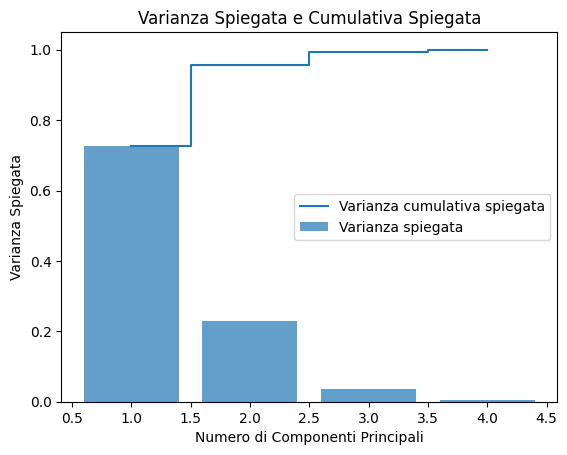

In [ ]:
cumulative_variance = explained_variance.cumsum()

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Varianza spiegata')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza cumulativa spiegata')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.legend(loc='best')
plt.title('Varianza Spiegata e Cumulativa Spiegata')
plt.show()


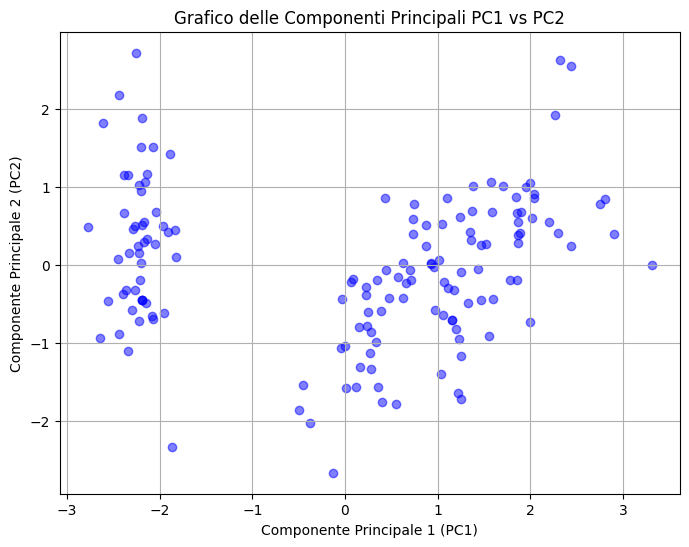

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c='b', marker='o', alpha=0.5)
plt.xlabel('Componente Principale 1 (PC1)')
plt.ylabel('Componente Principale 2 (PC2)')
plt.title('Grafico delle Componenti Principali PC1 vs PC2')
plt.grid(True)
plt.show()


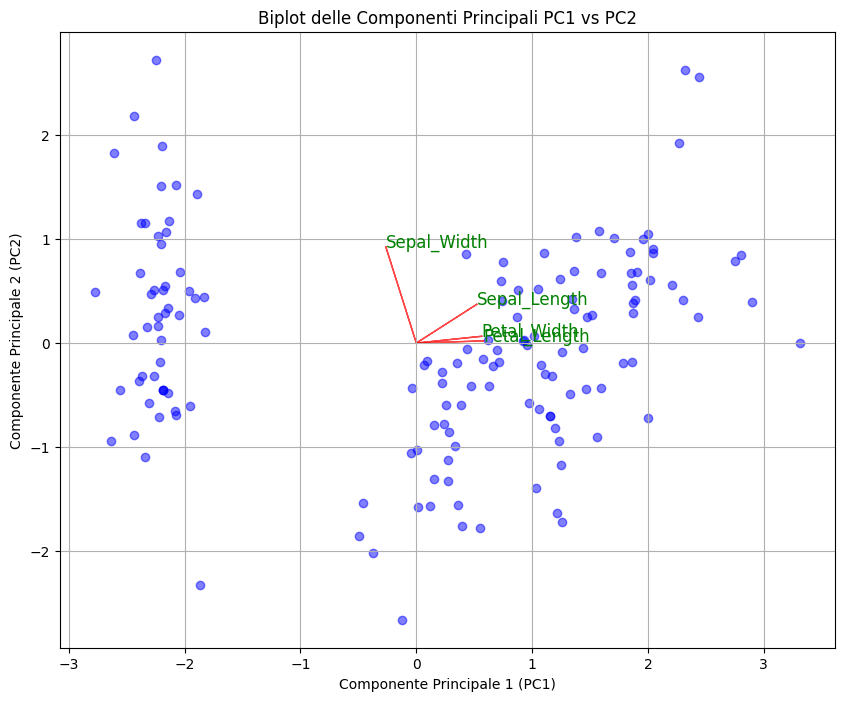

In [ ]:
#Biplot
X_projected = pca.transform(Iris_scaled)

PC1 = pca.components_[0]
PC2 = pca.components_[1]

plt.figure(figsize=(10, 8))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c='b', marker='o', alpha=0.5)

for i, (x, y) in enumerate(zip(PC1, PC2)):
    plt.arrow(0, 0, x, y, color='r', alpha=0.7)
    plt.text(x, y, Iris.columns[i], color='g', fontsize=12)

plt.xlabel('Componente Principale 1 (PC1)')
plt.ylabel('Componente Principale 2 (PC2)')
plt.title('Biplot delle Componenti Principali PC1 vs PC2')
plt.grid(True)
plt.show()

In [ ]:
#try without standardization
pca = PCA()
X_new = pca.fit_transform(Iris)


In [ ]:
pca.get_covariance()


array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

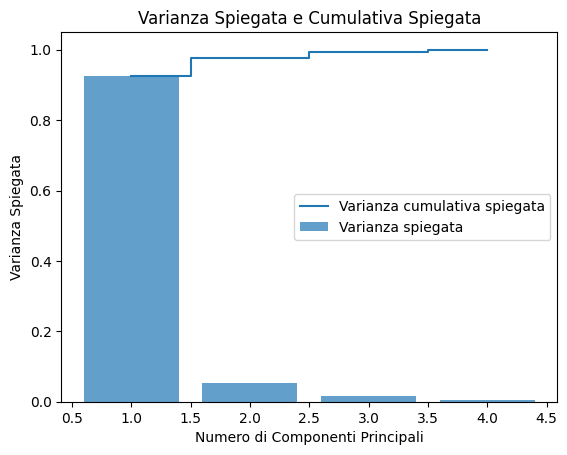

In [ ]:
cumulative_variance = explained_variance.cumsum()

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Varianza spiegata')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza cumulativa spiegata')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.legend(loc='best')
plt.title('Varianza Spiegata e Cumulativa Spiegata')
plt.show()

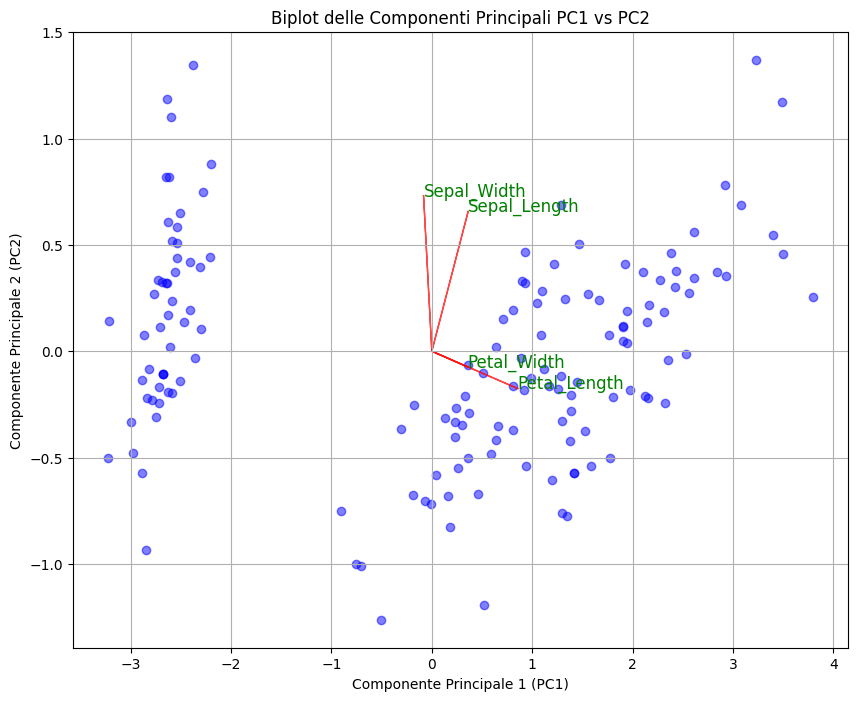

In [ ]:
#Biplot
X_projected = pca.transform(Iris)

PC1 = pca.components_[0]
PC2 = pca.components_[1]

plt.figure(figsize=(10, 8))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c='b', marker='o', alpha=0.5)

for i, (x, y) in enumerate(zip(PC1, PC2)):
    plt.arrow(0, 0, x, y, color='r', alpha=0.7)
    plt.text(x, y, Iris.columns[i], color='g', fontsize=12)

plt.xlabel('Componente Principale 1 (PC1)')
plt.ylabel('Componente Principale 2 (PC2)')
plt.title('Biplot delle Componenti Principali PC1 vs PC2')
plt.grid(True)
plt.show()